In [27]:
!pip install pytesseract

In [28]:
!apt-get update
!apt-get install tesseract-ocr

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pac

In [69]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.


In [70]:
import pytesseract
from PIL import Image, ImageOps, ImageEnhance, ImageFilter
from matplotlib import pyplot as plt

In [74]:
# Tesseractの実行ファイルのパスを指定
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

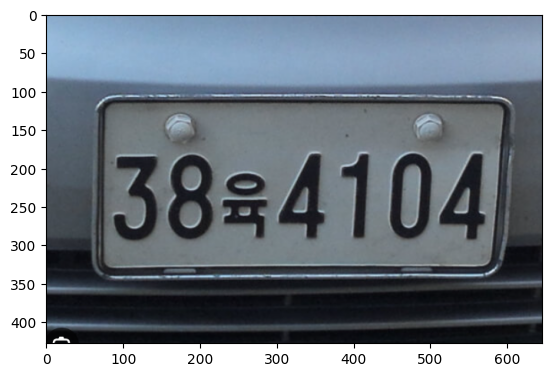

In [114]:
image_path = r"/content/스크린샷 2024-08-09 153849.png"
# 画像の読み込み
image = Image.open(image_path)

plt.imshow(image)

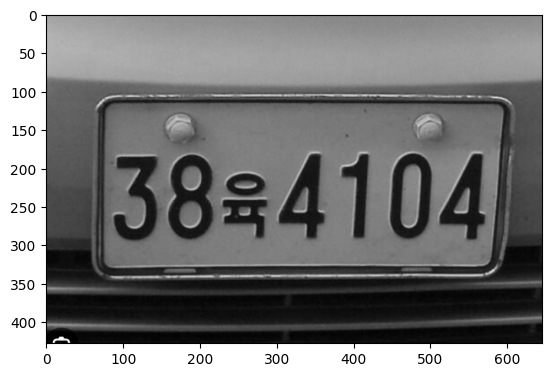

In [115]:
# 画像をグレースケールに変換
gray_image = ImageOps.grayscale(image)

plt.imshow(gray_image, cmap='gray')

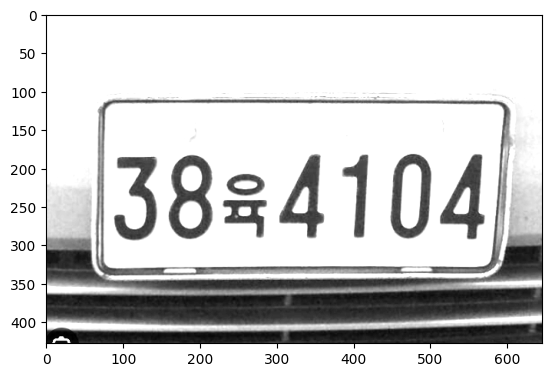

In [117]:
# 明るさを調整（必要に応じて）
brightness_enhancer = ImageEnhance.Brightness(gray_image)
bright_image = brightness_enhancer.enhance(3)  # 明るさを1.5倍にする

plt.imshow(bright_image, cmap='gray')

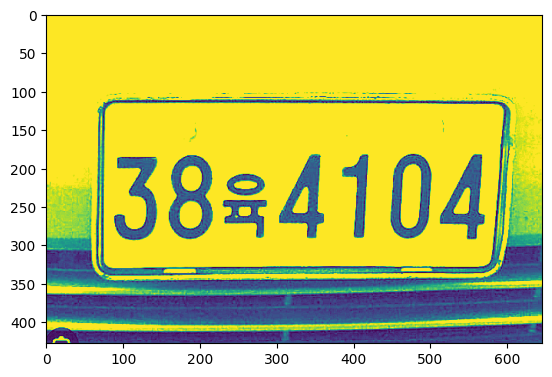

In [118]:
# エッジを強調
edge_image = bright_image.filter(ImageFilter.EDGE_ENHANCE)

plt.imshow(edge_image)

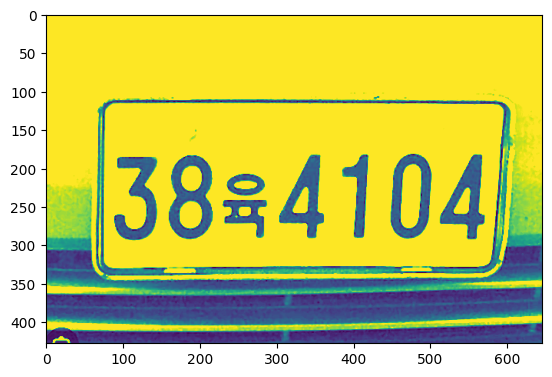

In [119]:
# 画像のノイズを除去
clean_image = edge_image.filter(ImageFilter.MedianFilter())

plt.imshow(clean_image)

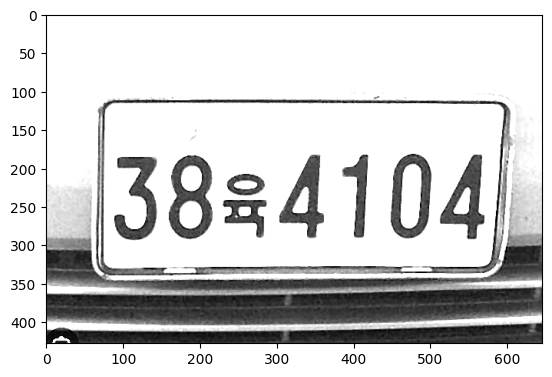

In [120]:
# 画像をグレースケールに変換
gray_image = ImageOps.grayscale(clean_image)

plt.imshow(gray_image, cmap='gray')

In [123]:
# 言語コード 認識
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(gray_image, lang='kor+eng', config=custom_config)
print(text)

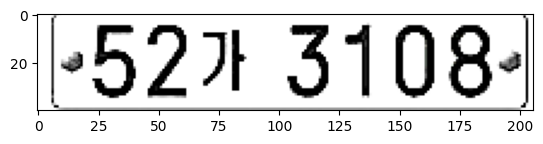

In [94]:
# コントラストを調整
enhancer = ImageEnhance.Contrast(bright_image)
contrast_image = enhancer.enhance(-2)  # コントラストを2倍にする

plt.imshow(edge_image, cmap='gray')

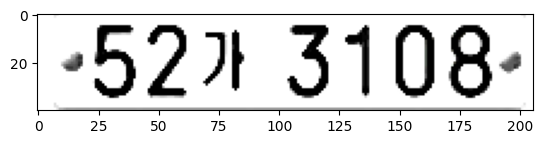

In [95]:
# 画像のノイズを除去
clean_image = edge_image.filter(ImageFilter.MedianFilter())

plt.imshow(clean_image)

In [54]:
# 画像を二値化
bin_image = contrast_image.point(lambda x: 0 if x < 128 else 255, '1')

plt.imshow(bin_image, cmap='gray')

ValueError: wrong number of lut entries